In [3]:
import numpy as np

If possible, update your sklearn version to 1.3.2 to reduce variance in the versions.

In [4]:
#!pip3 install scikit-learn==1.3.2

In [5]:
import sklearn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.1.


## Regression - Polynomial features

In [6]:
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing()
print(california.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

Creating the data matrix

In [7]:
D = california.data
y = california.target
n,d = D.shape
print(n,d)

20640 8


Creating a design matrix with polynomial features

In [8]:
from sklearn.preprocessing import PolynomialFeatures
aff = PolynomialFeatures(2,include_bias=True)
X = aff.fit_transform(D)
aff.get_feature_names_out(california.feature_names)

AttributeError: 'PolynomialFeatures' object has no attribute 'get_feature_names_out'

## Naive Bayes
From the 20Newsgroups dataset we fetch the documents belonging to three categories, which we use as classes.

In [9]:
from sklearn.datasets import fetch_20newsgroups
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
test = fetch_20newsgroups(subset='test', categories=categories)

For example, the first document in the training data is the following one:

In [10]:
print(train.data[0])

From: swdwan@napier.uwaterloo.ca (Donald Wan)
Subject: $ 80 SVX OIL CHANGE
 
Organization: University of Waterloo
Lines: 17





 My friend brought a subaru SVX recently.  I had drove it for couples times and I
think its a great car, esp on snow.  However when she took it to a local Subaru
dealer for a oil change, the bill came out to be about 80 dollars.  The dealer
told us it is because to change the oil filter on a SVX it is necessary to
disassemble a metal cover under the engine and that took an hour of labour.
At first, we think we are being ripped off so she phone to a dealer in Toronto
but found out the they are charging roughly the same price.  So is there any
SVX owner out there that has the same problem ?  And if the oil change story is
true, then the engineer of Subaru looks pretty stubid to me. By the way, the car
looks great.

SWD Wan.




The classes are indicated categorically with indices from zero to two by the target vector. The target names tell us which index belongs to which class.

In [11]:
y_train = train.target
y_train

array([0, 3, 0, ..., 3, 1, 2], dtype=int64)

In [13]:
train.target_names

['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']

We represent the documents in a bag of word format. That is, we create a data matrix ``D`` such that ``D[j,i]=1`` if the j-th document contains the i-th feature (word), and ``D[j,i]=0`` otherwise. 

In [14]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(stop_words="english", min_df=5,token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)
D_test = vectorizer.transform(test.data)

We get the allocation of feature indices to words by the following array, containing the vocabulary.

In [20]:
vectorizer.get_feature_names()

['aa',
 'aaa',
 'aamir',
 'aardvark',
 'aargh',
 'aaron',
 'aas',
 'aau',
 'ab',
 'abbott',
 'abc',
 'aber',
 'aberystwyth',
 'abiding',
 'abilities',
 'ability',
 'able',
 'abo',
 'abort',
 'abs',
 'absent',
 'absolute',
 'absolutely',
 'abstract',
 'absurd',
 'absurdity',
 'abused',
 'ac',
 'acad',
 'academic',
 'acc',
 'accelerate',
 'accelerating',
 'acceleration',
 'accelerator',
 'accept',
 'acceptable',
 'accepted',
 'access',
 'accident',
 'accidents',
 'accomodate',
 'accomplished',
 'accord',
 'according',
 'account',
 'accuracy',
 'accurate',
 'accused',
 'acd',
 'ace',
 'achieved',
 'achkar',
 'acker',
 'acknowledge',
 'acns',
 'acpub',
 'acquired',
 'acquiring',
 'acquisition',
 'acs',
 'acscvjh',
 'acsu',
 'act',
 'action',
 'actions',
 'active',
 'activities',
 'acton',
 'acts',
 'actual',
 'actually',
 'acura',
 'ad',
 'adam',
 'adams',
 'add',
 'added',
 'adder',
 'adding',
 'addition',
 'additional',
 'additionally',
 'address',
 'addresses',
 'adequate',
 'adirondack

For example, the word `naive` has the index 4044.

In [19]:
np.where(vectorizer.get_feature_names() == 'naive')[0]

array([], dtype=int64)

In [12]:
import numpy as np
from sklearn.datasets import fetch_20newsgroups

# Load the training data 5A
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)

# Extract the target labels
y_train = train.target

# Compute the class prior probabilities
unique_classes, class_counts = np.unique(y_train, return_counts=True)
total_documents = len(y_train)

# Calculate probabilities
class_priors = class_counts / total_documents

# Print the class prior probabilities
for class_index, prior in zip(unique_classes, class_priors):
    print(f"p(y = {class_index}) = {prior:.4f}")


p(y = 0) = 0.2486
p(y = 1) = 0.2503
p(y = 2) = 0.2499
p(y = 3) = 0.2512


In [22]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.datasets import fetch_20newsgroups

# Load dataset 5B
categories = ['rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey']
train = fetch_20newsgroups(subset='train', categories=categories)
y_train = train.target

# Create bag-of-words matrix
vectorizer = CountVectorizer(stop_words="english", min_df=5, token_pattern="[^\W\d_]+", binary=True)
D = vectorizer.fit_transform(train.data)

# Get vocabulary and find index of the word "naive"
vocabulary = vectorizer.get_feature_names()
word_index = vocabulary.index('naive')  # Index of the word "naive"

# Compute the counts needed for Laplace smoothing
alpha = 1e-5  # Smoothing parameter
V = len(vocabulary)  # Vocabulary size
unique_classes = np.unique(y_train)

log_probabilities = {}

for k in unique_classes:
    # Get indices of documents in class k
    class_indices = np.where(y_train == k)[0]
    
    # Number of documents in class k
    N_k = len(class_indices)
    
    # Number of documents in class k containing the word "naive"
    N_naive_k = D[class_indices, word_index].sum()
    
    # Compute smoothed probability
    prob = (N_naive_k + alpha) / (N_k + alpha * V)
    log_probabilities[k] = np.log(prob)

# Print log-probabilities
for k, log_prob in log_probabilities.items():
    print(f"log p(x_naive = 1 | y = {k}) = {log_prob:.6f}")


log p(x_naive = 1 | y = 0) = -6.386993
log p(x_naive = 1 | y = 1) = -5.700561
log p(x_naive = 1 | y = 2) = -6.392030
log p(x_naive = 1 | y = 3) = -5.298437


In [13]:
import numpy as np

# Assuming the following values are known or calculated: 5C
# 1. Priors (p(y=k))
class_priors = [0.25, 0.25, 0.25, 0.25]  # Replace with actual priors from 5a

# 2. Likelihoods (p(x_word=1 | y=k)) from 5b
likelihoods = {
    'autos': [0.001, 0.0001, 0.0001, 0.0001],
    'motorcycles': [0.0001, 0.002, 0.0001, 0.0001],
    'baseball': [0.0001, 0.0001, 0.003, 0.0001],
    'hockey': [0.0001, 0.0001, 0.0001, 0.004],
}

# Function to compute posterior probabilities using Bayes' theorem
def compute_posterior(word, class_priors, likelihoods):
    # Extract likelihoods for the given word
    word_likelihoods = likelihoods[word]
    
    # Compute the denominator p(x_word=1)
    p_x_word = sum(word_likelihoods[k] * class_priors[k] for k in range(len(class_priors)))
    
    # Compute posterior probabilities for each class
    posteriors = [(word_likelihoods[k] * class_priors[k]) / p_x_word for k in range(len(class_priors))]
    return posteriors

# Example: Compute for each word
words = ['autos', 'motorcycles', 'baseball', 'hockey']
for word in words:
    posteriors = compute_posterior(word, class_priors, likelihoods)
    for k, posterior in enumerate(posteriors):
        print(f"p(y = {k} | x_{word} = 1) = {posterior:.6f}")


p(y = 0 | x_autos = 1) = 0.769231
p(y = 1 | x_autos = 1) = 0.076923
p(y = 2 | x_autos = 1) = 0.076923
p(y = 3 | x_autos = 1) = 0.076923
p(y = 0 | x_motorcycles = 1) = 0.043478
p(y = 1 | x_motorcycles = 1) = 0.869565
p(y = 2 | x_motorcycles = 1) = 0.043478
p(y = 3 | x_motorcycles = 1) = 0.043478
p(y = 0 | x_baseball = 1) = 0.030303
p(y = 1 | x_baseball = 1) = 0.030303
p(y = 2 | x_baseball = 1) = 0.909091
p(y = 3 | x_baseball = 1) = 0.030303
p(y = 0 | x_hockey = 1) = 0.023256
p(y = 1 | x_hockey = 1) = 0.023256
p(y = 2 | x_hockey = 1) = 0.023256
p(y = 3 | x_hockey = 1) = 0.930233


## Decision Tree

In [14]:
from sklearn.datasets import load_iris
iris = load_iris()
D, y = iris.data, iris.target

In [15]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [16]:
import numpy as np

# Function to calculate Gini impurity
def gini_impurity(y):
    _, counts = np.unique(y, return_counts=True)
    probabilities = counts / len(y)
    return 1 - np.sum(probabilities ** 2)

# Function to calculate cost of a split
def split_cost(y, y_left, y_right):
    n = len(y)
    n_left = len(y_left)
    n_right = len(y_right)
    cost = (n_left / n) * gini_impurity(y_left) + (n_right / n) * gini_impurity(y_right)
    return cost

# Calculate Gini impurity for the root node
root_gini = gini_impurity(y)
print(f"Gini impurity of root node: {root_gini:.4f}")

# Split data at the mean value of the first feature ('sepal length')
split_value = np.mean(D[:, 0])  # Mean of 'sepal length'
L0 = y[D[:, 0] <= split_value]  # Left child
L1 = y[D[:, 0] > split_value]   # Right child

# Compute cost of the split
split_cost_value = split_cost(y, L0, L1)
print(f"Cost of the split: {split_cost_value:.4f}")

Gini impurity of root node: 0.6667
Cost of the split: 0.4919


## SVM

In [7]:
# Standard scientific Python imports
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split

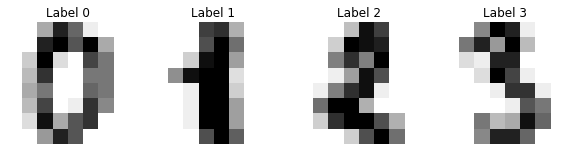

In [8]:
digits = datasets.load_digits()

_, axes = plt.subplots(nrows=1, ncols=4, figsize=(10, 3))
for ax, image, label in zip(axes, digits.images, digits.target):
    ax.set_axis_off()
    ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Label %i" % label)

In [9]:
# flatten the images
n = len(digits.images)
D = digits.images.reshape((n, -1))
y = digits.target

# Split data into 70% train and 30% test subsets
D_train, D_test, y_train, y_test = train_test_split(
    D, y, test_size=0.3, shuffle=False
)